In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('credit_dataset.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-1.000000,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1


In [4]:
X = data.drop('Class', axis=1)
y = data['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Using RandomForest Model

In [7]:
rfm = RandomForestClassifier(random_state=42)
rfm.fit(X_train, y_train)
y_pred_rfm = rfm.predict(X_test)

In [9]:
accuracy_score_rfm = accuracy_score(y_test, y_pred_rfm)
confusion_matrix_rfm = confusion_matrix(y_test, y_pred_rfm)
classification_report_rfm = classification_report(y_test, y_pred_rfm)
print("Random Forest Model")
print(f"Accuracy: {accuracy_score_rfm*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix_rfm)
print("Classification Report:")
print(classification_report_rfm)

Random Forest Model
Accuracy: 97.50%
Confusion Matrix:
[[18  1]
 [ 0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [12]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 2.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 2.4 MB/s eta 0:00:00 MB/s eta 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [seaborn]━━━ 7/9 [matplotlib]tools]


In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

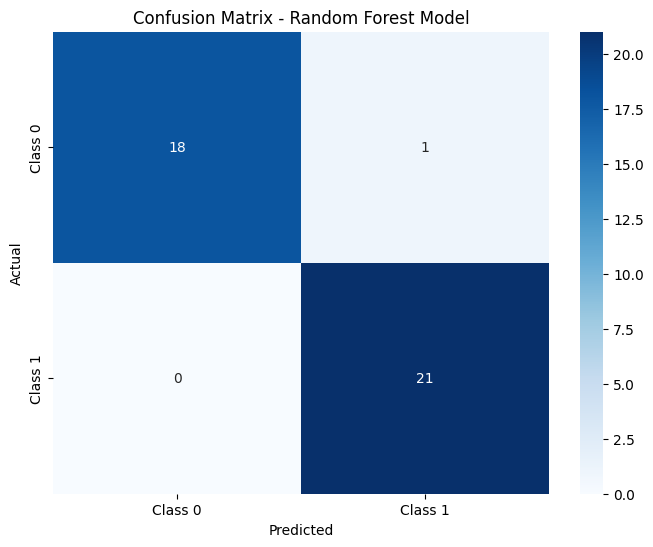

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rfm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Using Logistic Regression Model

In [14]:
lrm = LogisticRegression(random_state=42, solver='liblinear')
lrm.fit(X_train, y_train)
y_pred_lrm = lrm.predict(X_test)

/Users/yourname/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/yourname/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/yourname/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [15]:
print("Logistic Regression Model")
accuracy_score_lrm = accuracy_score(y_test, y_pred_lrm)
confusion_matrix_lrm = confusion_matrix(y_test, y_pred_lrm)
classification_report_lrm = classification_report(y_test, y_pred_lrm)
print(f"Accuracy: {accuracy_score_lrm*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix_lrm)
print("Classification Report:")
print(classification_report_lrm)

Logistic Regression Model
Accuracy: 92.50%
Confusion Matrix:
[[17  2]
 [ 1 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.91      0.95      0.93        21

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



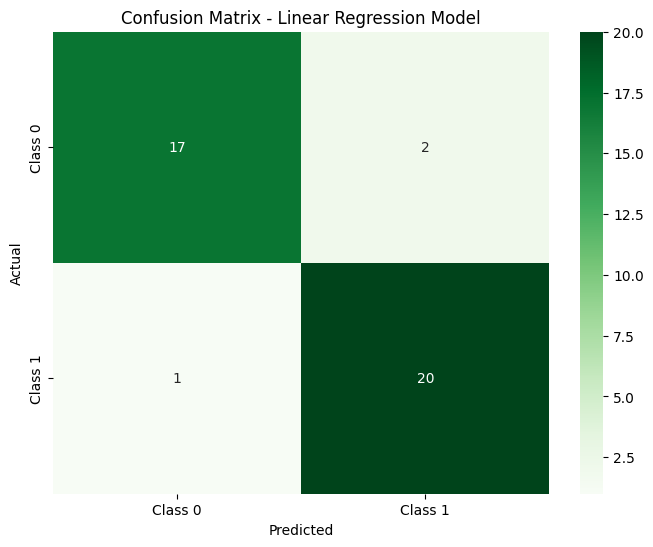

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_lrm, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Linear Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Using Support Vector Machine Model (SVM)

In [18]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [19]:
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm) 
classification_report_svm = classification_report(y_test, y_pred_svm)

In [20]:
print("SVM Model")
print(f"Accuracy: {accuracy_score_svm*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix_svm)
print("Classification Report:")
print(classification_report_svm)

SVM Model
Accuracy: 77.50%
Confusion Matrix:
[[17  2]
 [ 7 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.88      0.67      0.76        21

    accuracy                           0.78        40
   macro avg       0.79      0.78      0.77        40
weighted avg       0.80      0.78      0.77        40



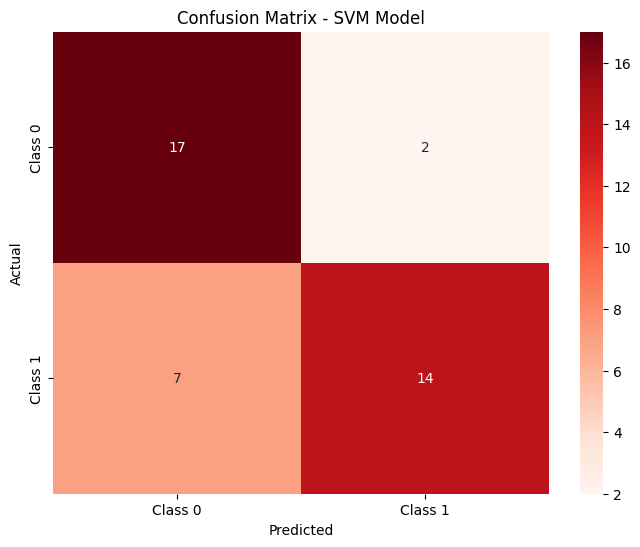

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Using K-Nearest Neighbours Model


In [23]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [24]:
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

In [25]:
print("KNN Model")
print(f"Accuracy: {accuracy_score_knn*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix_knn)
print("Classification Report:")
print(classification_report_knn)

KNN Model
Accuracy: 75.00%
Confusion Matrix:
[[13  6]
 [ 4 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.74      0.81      0.77        21

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40



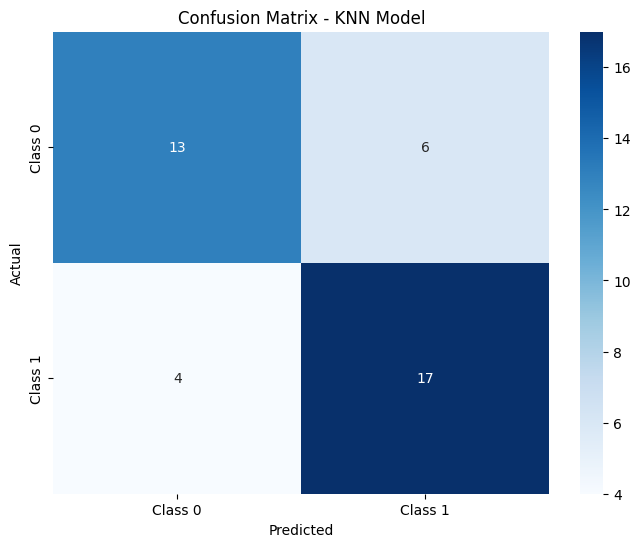

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()